## UGCA Project 1 Report
By Yuejia Feng, Ting-Yi Hung, Abhilasha Kanitkar, Brian Peterson  

We scraped all the comments in all the forums under the tires and wheels section of edmunds (42,890 comments)  
https://forums.edmunds.com/discussions/tagged/x/tires-wheels

## Import and clean data

In [7]:
import json
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from functools import reduce
from collections import Counter

with open("edmunds_comment_data.json", 'r') as f:
    js = json.load(f)

commentcount = 0
characterstoclean = r'?!,:,/\"-+=@#$%^&*()><{}[]|' + r"'"

commentsdict = {}
words = []
for i in js.keys():
    for j in js[i].keys():
        for k in js[i][j].keys():
            for l in js[i][j][k].keys():
                commentcount+=1
                cleanwords = []
#                 for w in word_tokenize(js[i][j][k][l]):
#                     cleanword = ''.join( c for c in w if c not in characterstoclean ).lower()
#                     cleanwords.append(cleanword)
#                     words.append(cleanword)
                comment = ''
                # to remove quoted content in comments, not 100% effective
                for s in sent_tokenize(js[i][j][k][l].lower()):
                    if "said:" not in s:
                        comment+=" " + s
                for c in characterstoclean:
                    comment = comment.replace(c,'')
                for w in word_tokenize(comment):
                    cleanwords.append(w)
                    words.append(w)                
                
                commentsdict['comment' + str(commentcount)] = ' '.join(cleanwords)
                

print("Number of comments scraped: " + str(commentcount))

Number of comments scraped: 42890


## Top 10 most frequently used words

In [8]:
cnt = Counter(words)

In [39]:
from nltk.corpus import stopwords
from nltk.corpus import brown
stopwords_set = set(stopwords.words('english'))
brown_set = set(brown.words())

In [49]:
ranked_cnt = []
for i in cnt:
    if i not in stopwords_set and i not in characterstoclean and i != '.' and i != '...' :
        ranked_cnt.append( (cnt[i], i) )
ranked_cnt.sort(reverse=True)

for i in range(len(ranked_cnt[:10])):
    print(str(i+1) + ") '" + str(ranked_cnt[i][1]) + "' appeared " + str(ranked_cnt[i][0]) + ' times')

1) 'tires' appeared 23827 times
2) 'tire' appeared 16121 times
3) 'car' appeared 9481 times
4) 'would' appeared 8370 times
5) 'new' appeared 6485 times
6) 'get' appeared 6235 times
7) 'miles' appeared 5916 times
8) 'like' appeared 5771 times
9) 'one' appeared 5637 times
10) 'good' appeared 5113 times


Note: we removed stopwords from the above list

## Top 10 Mentioned Brands

In [72]:
brands = ['BFGoodrich', 'Bridgestone', 'Continental', 'Cooper', 'Dunlop', 'Falken', 'Firestone', 'General', 'Goodyear', 'GT Radial', 'Hankook', 'Kumho', 'Michelin', 'Nexen', 'Nitto', 'Nokian', 'Pirelli', 'Sumitomo', 'Toyo', 'Uniroyal', 'Yokohama']
brand_counts = []
for i in brands:
    brand_counts.append((i, cnt[i.lower()] ))

brand_counts.sort(key=lambda x: x[1], reverse=True)

for i in range(len(brand_counts[:10])):
    print(str(i+1) + ") the brand '" + str(brand_counts[i][0]) + "' was mentioned " + str(brand_counts[i][1]) + ' times')

1) the brand 'Michelin' was mentioned 2579 times
2) the brand 'Bridgestone' was mentioned 1533 times
3) the brand 'Goodyear' was mentioned 1358 times
4) the brand 'Toyo' was mentioned 622 times
5) the brand 'Firestone' was mentioned 531 times
6) the brand 'Dunlop' was mentioned 499 times
7) the brand 'Continental' was mentioned 450 times
8) the brand 'Yokohama' was mentioned 441 times
9) the brand 'General' was mentioned 398 times
10) the brand 'Nokian' was mentioned 350 times


### TASK A: Find lift values for brands

#### 1) For each brand, find the number of comments that mention it 

In [163]:
brands = {'BFGoodrich', 'Bridgestone', 'Continental', 'Cooper', 'Dunlop', 'Falken', 'Firestone', 'General', 'Goodyear', 'Hankook', 'Kumho', 'Michelin', 'Nexen', 'Nitto', 'Nokian', 'Pirelli', 'Sumitomo', 'Toyo', 'Uniroyal', 'Yokohama'}
brands = list(map(lambda x: x.lower(), brands))
brand_mention = dict()

#initialize counter
for i in brands:
    brand_mention[i] = dict()
    
for i in brands:
    for j in commentsdict:
        for k in word_tokenize(commentsdict[j]):
            if k == i:
                brand_mention[i][j] = commentsdict[j]
                break


In [164]:
brand_mention_list = []
for i in brand_mention:
    brand_mention_list.append( (i, len(brand_mention[i])))
brand_mention_list.sort(key=lambda x: x[1], reverse=True)

In [383]:
for i in range(len(brand_mention_list[:10])):
    print(str(i+1) + ") The brand '" + str(brand_mention_list[i][0].title(),) + "' was mentioned " + str(brand_mention_list[i][1]) + ' times')

1) The brand 'Michelin' was mentioned 2097 times
2) The brand 'Bridgestone' was mentioned 1336 times
3) The brand 'Goodyear' was mentioned 1147 times
4) The brand 'Toyo' was mentioned 451 times
5) The brand 'Dunlop' was mentioned 447 times
6) The brand 'Firestone' was mentioned 435 times
7) The brand 'Continental' was mentioned 399 times
8) The brand 'Yokohama' was mentioned 387 times
9) The brand 'General' was mentioned 376 times
10) The brand 'Pirelli' was mentioned 314 times


#### 2) Calculate Lift Values

In [167]:
# first we need to find the number of messages containing each pair of brands

# for each brand mentioned, find number of times the another brand was also mentioned
cross_brand = dict()

# init dictionary
for i in brand_mention:
    cross_brand[i] = dict()
    for j in brand_mention:
        cross_brand[i][j] = dict() 

for i in brands:
    for j in brand_mention:
        for k in brand_mention[j]:
            for l in word_tokenize(brand_mention[j][k]):
                if l == i:
                    cross_brand[i][j][k] = brand_mention[j][k]
                    break
        

In [168]:
# pick two brands and you can use this dictionary to find the comments that have both in it
cross_brand['nitto']['michelin']

{'comment10859': 'ive got a 2009 limited and am looking for the 3rd set of tires . the oem toyos were the only option when the car was new . they lasted about 60k miles but had poor wet traction even when new . the next set wereare nitto crosstek cuv . they are at the wear bars now at 51k miles . these have a slightly harsher ride than the toyos but pretty good traction for wet and dry . i may replace with the same nitto tire however im curious if anyone has used michelin latitude tour hp long enough for a review ...',
 'comment11054': 'unusual wear on the tires ... auto manufacturers need to sell their cars with tires that are unlikely to cup . all cars have funky amounts of camber and toe which causes tires to cup . the nitto motivos you guys took off the charger are pretty good at not cupping as are michelin primacy mxv4s and pilot sport as 3s . i cant believe they equip their cars with the garbage goodyear ls2 tires .'}

In [ ]:
total_comments = len(commentsdict)

In [191]:
# now we can calculate the lift value
data=[]
for i in range(len(cross_brand.keys())):
    row = []
    for j in range(len(cross_brand[list(cross_brand.keys())[i]].keys())):
        if j > i:
            row.append(round( len(cross_brand[list(cross_brand.keys())[i]][list(cross_brand.keys())[j]])\
                             / (len(brand_mention[list(cross_brand.keys())[i]])\
                                * len(brand_mention[list(cross_brand.keys())[j]]) ) * total_comments, 4))
        else:
            row.append('')
    data.append(row)

In [192]:
lift_chart = pd.DataFrame(data, columns=cross_brand.keys(), index=cross_brand.keys())

In [194]:
print("Lift Values")
lift_chart

Lift Values


,cooper,bridgestone,goodyear,nokian,general,hankook,falken,michelin,dunlop,yokohama,nitto,nexen,sumitomo,firestone,uniroyal,continental,pirelli,toyo,kumho,bfgoodrich
cooper,,3.4964,3.3321,3.0117,4.5176,6.3858,2.6877,2.2276,5.7,3.2919,0,0,7.864,3.4168,9.6512,2.6607,6.762,1.8832,5.4443,3.7915
bridgestone,,,3.1907,1.8215,1.9638,2.6552,3.6573,4.1947,4.5964,3.7329,1.0032,0,1.7835,5.5351,3.6481,7.2413,5.112,4.1998,2.9399,2.8664
goodyear,,,,1.8564,2.4862,4.4984,1.8933,3.8517,4.35,4.348,2.3371,6.5988,5.5397,4.0402,4.2492,1.9681,3.8108,2.4044,2.7394,6.6774
nokian,,,,,1.618,1.1436,0,1.5956,3.0623,1.572,0,0,2.8165,1.0489,0,0.7624,2.4219,1.3489,0.5571,0
general,,,,,,1.7153,4.3317,2.339,2.0415,2.6528,3.5647,0,8.4496,3.9334,7.7774,2.573,5.8124,2.0234,5.8497,8.1478
hankook,,,,,,,4.082,3.8446,2.1643,4.9997,0,0,11.9437,2.224,7.3291,4.8493,6.1621,8.5804,11.8125,5.7586
falken,,,,,,,,3.1068,7.2874,9.8201,33.932,0,10.0539,1.2481,12.3389,1.3607,3.458,8.4266,5.9661,9.6948
michelin,,,,,,,,,4.2096,4.1223,1.2783,3.6094,2.6513,2.7741,3.2539,2.7681,4.755,2.721,2.9968,4.3828
dunlop,,,,,,,,,,6.6942,2.9985,0,23.0993,3.7498,4.3614,2.4048,8.8617,2.9785,3.5147,1.7134
yokohama,,,,,,,,,,,0,0,12.3141,2.293,5.0376,2.2221,9.1767,2.9488,4.8715,9.8953


#### 3) Graph MDS Chart

In [386]:
# now we can calculate the lift value
data=[]
for i in range(len(cross_brand.keys())):
    row = []
    for j in range(len(cross_brand[list(cross_brand.keys())[i]].keys())):
            row.append(round( len(cross_brand[list(cross_brand.keys())[i]][list(cross_brand.keys())[j]])\
                             / (len(brand_mention[list(cross_brand.keys())[i]])\
                                * len(brand_mention[list(cross_brand.keys())[j]]) ) * total_comments, 4))
    data.append(row)

In [387]:
similarity_matrix = pd.DataFrame(data, columns=cross_brand.keys(), index=cross_brand.keys())

In [388]:
disimilarity_matrix = similarity_matrix.apply(lambda x: 1/x)

In [389]:
disimilarity_matrix

,cooper,bridgestone,goodyear,nokian,general,hankook,falken,michelin,dunlop,yokohama,nitto,nexen,sumitomo,firestone,uniroyal,continental,pirelli,toyo,kumho,bfgoodrich
cooper,0.004710,0.286008,0.300111,0.332038,0.221356,0.156597,0.372065,0.448914,0.175439,0.303776,inf,inf,0.127162,0.292672,0.103614,0.375841,0.147885,0.531011,0.183678,0.263748
bridgestone,0.286008,0.031149,0.313411,0.548998,0.509217,0.376619,0.273426,0.238396,0.217562,0.267888,0.996810,inf,0.560695,0.180665,0.274115,0.138097,0.195618,0.238107,0.340148,0.348870
goodyear,0.300111,0.313411,0.026743,0.538677,0.402220,0.222301,0.528178,0.259626,0.229885,0.229991,0.427881,0.151543,0.180515,0.247512,0.235338,0.508104,0.262412,0.415904,0.365043,0.149759
nokian,0.332038,0.548998,0.538677,0.006575,0.618047,0.874432,inf,0.626723,0.326552,0.636132,inf,inf,0.355051,0.953380,inf,1.311647,0.412899,0.741345,1.795010,inf
general,0.221356,0.509217,0.402220,0.618047,0.008767,0.582988,0.230856,0.427533,0.489836,0.376960,0.280529,inf,0.118349,0.254233,0.128578,0.388651,0.172046,0.494218,0.170949,0.122733
hankook,0.156597,0.376619,0.222301,0.874432,0.582988,0.003101,0.244978,0.260105,0.462043,0.200012,inf,inf,0.083726,0.449640,0.136442,0.206215,0.162282,0.116545,0.084656,0.173653
falken,0.372065,0.273426,0.528178,inf,0.230856,0.244978,0.001842,0.321875,0.137223,0.101832,0.029471,inf,0.099464,0.801218,0.081045,0.734916,0.289184,0.118672,0.167614,0.103148
michelin,0.448914,0.238396,0.259626,0.626723,0.427533,0.260105,0.321875,0.048893,0.237552,0.242583,0.782289,0.277054,0.377173,0.360477,0.307324,0.361259,0.210305,0.367512,0.333689,0.228165
dunlop,0.175439,0.217562,0.229885,0.326552,0.489836,0.462043,0.137223,0.237552,0.010422,0.149383,0.333500,inf,0.043291,0.266681,0.229284,0.415835,0.112845,0.335739,0.284519,0.583635
yokohama,0.303776,0.267888,0.229991,0.636132,0.376960,0.200012,0.101832,0.242583,0.149383,0.009023,inf,inf,0.081208,0.436110,0.198507,0.450025,0.108972,0.339121,0.205276,0.101058


In [390]:
# to clean this of the infinity values, we'll remove some of the least popular brands and change 
disimilarity_matrix.drop('nitto', axis=0, inplace=True)
disimilarity_matrix.drop('nitto', axis=1, inplace=True)
disimilarity_matrix.drop('nexen', axis=0, inplace=True)
disimilarity_matrix.drop('nexen', axis=1, inplace=True)
disimilarity_matrix.drop('nokian', axis=0, inplace=True)
disimilarity_matrix.drop('nokian', axis=1, inplace=True)
disimilarity_matrix.drop('bfgoodrich', axis=0, inplace=True)
disimilarity_matrix.drop('bfgoodrich', axis=1, inplace=True)
disimilarity_matrix.drop('uniroyal', axis=0, inplace=True)
disimilarity_matrix.drop('uniroyal', axis=1, inplace=True)

In [391]:
# disimilarity_matrix['bfgoodrich']['uniroyal'] = 1
# disimilarity_matrix['uniroyal']['bfgoodrich'] = 1

In [393]:
disimilarity_matrix

,cooper,bridgestone,goodyear,general,hankook,falken,michelin,dunlop,yokohama,sumitomo,firestone,continental,pirelli,toyo,kumho
cooper,0.004710,0.286008,0.300111,0.221356,0.156597,0.372065,0.448914,0.175439,0.303776,0.127162,0.292672,0.375841,0.147885,0.531011,0.183678
bridgestone,0.286008,0.031149,0.313411,0.509217,0.376619,0.273426,0.238396,0.217562,0.267888,0.560695,0.180665,0.138097,0.195618,0.238107,0.340148
goodyear,0.300111,0.313411,0.026743,0.402220,0.222301,0.528178,0.259626,0.229885,0.229991,0.180515,0.247512,0.508104,0.262412,0.415904,0.365043
general,0.221356,0.509217,0.402220,0.008767,0.582988,0.230856,0.427533,0.489836,0.376960,0.118349,0.254233,0.388651,0.172046,0.494218,0.170949
hankook,0.156597,0.376619,0.222301,0.582988,0.003101,0.244978,0.260105,0.462043,0.200012,0.083726,0.449640,0.206215,0.162282,0.116545,0.084656
falken,0.372065,0.273426,0.528178,0.230856,0.244978,0.001842,0.321875,0.137223,0.101832,0.099464,0.801218,0.734916,0.289184,0.118672,0.167614
michelin,0.448914,0.238396,0.259626,0.427533,0.260105,0.321875,0.048893,0.237552,0.242583,0.377173,0.360477,0.361259,0.210305,0.367512,0.333689
dunlop,0.175439,0.217562,0.229885,0.489836,0.462043,0.137223,0.237552,0.010422,0.149383,0.043291,0.266681,0.415835,0.112845,0.335739,0.284519
yokohama,0.303776,0.267888,0.229991,0.376960,0.200012,0.101832,0.242583,0.149383,0.009023,0.081208,0.436110,0.450025,0.108972,0.339121,0.205276
sumitomo,0.127162,0.560695,0.180515,0.118349,0.083726,0.099464,0.377173,0.043291,0.081208,0.001259,0.182558,0.167451,0.065890,0.141957,0.042965


In [394]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
mds = MDS()

In [396]:
mds_coordinates = pd.DataFrame(mds.fit_transform(disimilarity_matrix)) 

c:\program files\python36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


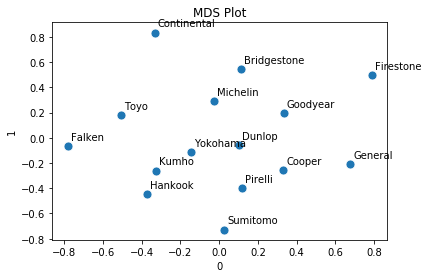

In [408]:
sns.scatterplot(mds_coordinates[0], mds_coordinates[1], s=80)
plt.title("MDS Plot")

brands = []
for i in disimilarity_matrix:
    brands.append(i)

# https://stackoverflow.com/questions/5147112/how-to-put-individual-tags-for-a-scatter-plot
for brand, x, y in zip(brands, mds_coordinates[0], mds_coordinates[1]):
    plt.annotate(
        brand.title(),
        xy=(x, y), xytext=(3, 4),
        textcoords='offset points', ha='left', va='bottom',
    )
plt.show()

### TASK B: Insights 

#### To Toyo:

As the 4th most talked about tire company, you are in a unique position. The three companies ahead of you are ahead by a significant margin. In fact, you're rarely in the same conversation as them. You have two strategies for moving forward. 1) You can compete with the three market leaders ahead of you and try to understand what is generating their success. Or 2) identify what makes you unique and understand which conversations you are in. If you are in a different conversations (perhaps drivers that are hyper concerned about safety) then maybe you should focus on that compentency and seperate yourself from the pack

#### To Michelin:

You are the most talked about tire brand, easily outpacing the competition. However, when according to our research, your brand is most similar to Bridgestone and Goodyear, the second and biggest in the market. You need to evaluate the services and core compentencies of yourself and those two competitors to ensure that the when customers compare you to them, they will choose you. If you stagnate then those two competitors will be the first to siphon your sales.

### Task C: 5 most frequent attributes and relationship with top 5 brands

In [443]:
ranked_cnt = []
for i in cnt:
    if i not in stopwords_set and i not in characterstoclean and i != '.' and i != '...' :
        ranked_cnt.append( (cnt[i], i) )
ranked_cnt.sort(reverse=True)

for i in range(len(ranked_cnt[:150])):
    print(str(i+1) + ") '" + str(ranked_cnt[i][1]) + "' appeared " + str(ranked_cnt[i][0]) + ' times')

1) 'tires' appeared 23827 times
2) 'tire' appeared 16121 times
3) 'car' appeared 9481 times
4) 'would' appeared 8370 times
5) 'new' appeared 6485 times
6) 'get' appeared 6235 times
7) 'miles' appeared 5916 times
8) 'like' appeared 5771 times
9) 'one' appeared 5637 times
10) 'good' appeared 5113 times
11) 'im' appeared 4493 times
12) 'dont' appeared 4282 times
13) 'wheels' appeared 4148 times
14) 'dealer' appeared 4034 times
15) 'problem' appeared 3930 times
16) 'also' appeared 3826 times
17) 'know' appeared 3699 times
18) 'snow' appeared 3573 times
19) 'think' appeared 3523 times
20) 'well' appeared 3386 times
21) 'much' appeared 3324 times
22) 'wheel' appeared 3306 times
23) 'better' appeared 3199 times
24) 'go' appeared 3139 times
25) 'set' appeared 3092 times
26) 'time' appeared 3089 times
27) 'back' appeared 3042 times
28) 'put' appeared 2985 times
29) 'thanks' appeared 2949 times
30) 'got' appeared 2924 times
31) 'ive' appeared 2770 times
32) 'need' appeared 2666 times
33) 'front'

<pre>
Top 5 frequent attributes:
    wear, years, replace(s) -> durability
    problem(s), issue(s)    -> issues
    dealer, service         -> dealer interactions
    snow, winter            -> weather performance, particularly in snow
    price, cost             -> price
</pre>

In [445]:
attributes = {
    'durability': dict(),
    'issues': dict(),
    'dealer': dict(),
    'weather': dict(),
    'price': dict()
             }

In [446]:
for i in commentsdict:
    for j in word_tokenize(commentsdict[i]):
        if j == 'wears' or j == 'wear' or j == 'years' or j == 'year' or j == 'replaces' or j == 'replace':
            attributes['durability'][i] = commentsdict[i]
        elif j == 'problems' or j == 'problem' or j == 'issue' or j == 'issues':
            attributes['issues'][i] = commentsdict[i]
        elif j == 'dealers' or j == 'dealer' or j == 'service' or j == 'services':
            attributes['dealer'][i] = commentsdict[i]
        elif j == 'snow' or j == 'snows' or j == 'winter':
            attributes['weather'][i] = commentsdict[i]
        elif j == 'price' or j == 'costs' or j == 'cost':
            attributes['price'][i] = commentsdict[i]

In [447]:
attributes['price']

{'comment6': 'i purchased a new 2001 sebring lxi convertible . im really happy with it . im considering buying the wind screen accessory that cost about 215. id like to get some feedback from anyone that might have one . does it really block the wind id appreciate any positive or negative comments .',
 'comment43': 'the whole bring the title or registration to the dealership and cough up 100 just burns my toast . the thing probably costs 89 cents to make . before spending that much on a new fob when all you really need is a new battery you might see if you can gently pry it apart and replace the battery . i just bought an 07 sebring and the fob has a little notch on one side that appears to be there to allow the owner to replace the battery . if replacing the battery causes it to lose communication with your car you might see if theres a procedure to program it in your manual without getting the dealer involved . there is one for the 07 .',
 'comment63': 'when my 2012 mazda cx9 had onl

### Lift values between brands for each attribute

In [478]:
top5brands = [i[0] for i in brand_mention_list[:5]]
top5brands

['michelin', 'bridgestone', 'goodyear', 'toyo', 'dunlop']

In [473]:
cross_brand_attribute = dict()
for brand1 in top5brands:
    cross_brand_attribute[brand1] = dict()
    for brand2 in top5brands:
        cross_brand_attribute[brand1][brand2] = dict()
        for attribute in attributes:
            cross_brand_attribute[brand1][brand2][attribute] = dict()

In [484]:
for brand1 in top5brands:
    for brand2 in top5brands:
        for attribute in attributes:
            for comment in attributes[attribute]:
                brand1_mention = 0
                brand2_mention = 0
                both_mention = 0
                
                for word in word_tokenize(attributes[attribute][comment]):
                    if brand1 == word:
                        brand1_mention = 1
                    if brand2 == word:
                        brand2_mention = 1
                    if brand1_mention == 1 and brand2_mention == 1:
                        both_mention = 1
                
                cross_brand_attribute[brand1][brand2][attribute][comment] = [brand1_mention, brand2_mention, both_mention]
                    

In [545]:
brand_attributes_lift_values = dict()
for brand1 in top5brands:
    brand_attributes_lift_values[brand1] = dict()
    for brand2 in top5brands:
        brand_attributes_lift_values[brand1][brand2] = dict()
        for attribute in attributes:
            results = list(cross_brand_attribute[brand1][brand2][attribute].values())
            lift_value = list(map(lambda x: x[2]/(x[1]*x[0]) * len(cross_brand_attribute[brand1][brand2][attribute].keys()), [pd.DataFrame(results).sum()]))[0] 
            brand_attributes_lift_values[brand1][brand2][attribute] = lift_value

In [549]:
brand_attributes_lift_values['michelin']['bridgestone']

{'durability': 2.813831815914803,
 'issues': 3.2503555268261155,
 'dealer': 2.257495590828924,
 'weather': 2.3532498877413563,
 'price': 2.499636495819702}

## Get all the comments that mention goodyear

In [11]:

goodyear_comments = {}
for i in commentsdict:
    if 'goodyear' in commentsdict[i]:
        goodyear_comments[i] = commentsdict[i]

In [12]:
len(goodyear_comments)

1381

## Get all the words used in comments that mention goodyear

In [13]:
words_in_goodyear_comments = []
for i in goodyear_comments:
    for j in word_tokenize(goodyear_comments[i]):
        words_in_goodyear_comments.append(j)

In [14]:
gdyr_cnt = Counter(words_in_goodyear_comments)

In [56]:
ranked_goyr_cnt = []
for i in gdyr_cnt:
    if i not in stopwords_set and i not in characterstoclean and i != '.' and i != '...' and i not in 'goodyears':
        ranked_goyr_cnt.append( (gdyr_cnt[i], i) )
ranked_goyr_cnt.sort(reverse=True)
ranked_goyr_cnt[:10]

[(2043, 'tires'),
 (1112, 'tire'),
 (516, 'miles'),
 (394, 'car'),
 (386, 'new'),
 (355, 'would'),
 (313, 'michelin'),
 (311, 'like'),
 (291, 'get'),
 (285, 'set')]

## Comments with goodyear and ____ in them

In [466]:
comparisonstring = 'wear'

comments_with_gdyr_and = []
for i in goodyear_comments:
    if comparisonstring in goodyear_comments[i]:
        comments_with_gdyr_and.append(goodyear_comments[i])
len(comments_with_gdyr_and)

203

In [26]:
comments_with_gdyr_and[0]

'hey thanks for your response . i did have them install 2 new goodyear tires to replace the 2 that i had just purchased and they are just as bad . the goodyears that i have are called american eagles . is that a private labled model maybe i would be better off going to a different walmart maybe they carry a different tire for my car . maybe they have technicians that are nice . maybe just maybe .'

Possibly filter lift value to represent associations within a maximum word count  
    Beto -- Healthcare (no more than 6 words in between)  
mds map a disimilarity matrix, not similarity matrix